In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import json
rouge=json.load(open('data/text_summarization_rouge.json'))

In [4]:
# nested dict to dataframe
show_wp = ["No Watermark", "$\delta$-reweight", "$\gamma$-reweight", "Soft Red List"]
def map_wp_str(wp_str):
    if "Delta" in wp_str:
        return show_wp[1]
    elif "Gamma" in wp_str:
        return show_wp[2]
    elif "John" in wp_str:
        return show_wp[3]
    if wp_str == "None":
        return show_wp[0]
    else:
        raise ValueError("Unknown watermark: {}".format(wp_str))
df = pd.DataFrame.from_dict(
    [{"wp": map_wp_str(wp_str), "score": score_str, "value": score} 
     for wp_str in rouge for score_str in rouge[wp_str] for score in rouge[wp_str][score_str]],
                            )
df.head()

,wp,score,value
0,$\gamma$-reweight,rouge1,0.435897
1,$\gamma$-reweight,rouge1,0.388889
2,$\gamma$-reweight,rouge1,0.315789
3,$\gamma$-reweight,rouge1,0.357143
4,$\gamma$-reweight,rouge1,0.304762


Text(0.5, 0, 'Watermark')

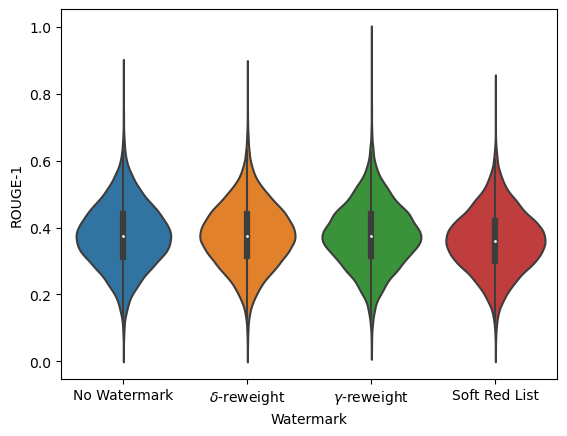

In [5]:
import seaborn as sns
sns.violinplot(data=df[df['score']=='rouge1'], x="wp", y="value",order=show_wp)
plt.ylabel("ROUGE-1")
plt.xlabel("Watermark")

In [6]:
# form a table, rows are wp, columns are score, item is mean and std (of mean) like 0.5±0.001
sdf = df.groupby(['wp', 'score']).agg(['mean', 'std', 'count'])
sdf = sdf['value'].apply(lambda x: "{:.4f}±{:.4f}".format(x['mean'], x['std']/np.sqrt(x['count'])), axis=1).unstack()
# reorder with the order of show_wp
sdf = sdf.loc[show_wp]
sdf

score,rouge1,rouge2,rougeL
wp,,,
No Watermark,0.3763±0.0009,0.1320±0.0007,0.2382±0.0007
$\delta$-reweight,0.3773±0.0009,0.1328±0.0007,0.2388±0.0007
$\gamma$-reweight,0.3770±0.0009,0.1323±0.0007,0.2385±0.0007
Soft Red List,0.3607±0.0009,0.1171±0.0007,0.2222±0.0007
